# LetsGrowMore
Beginner Task2

Name: Rehan Hudewale



Data Science Problem statement- Task 2 Stock Market Prediction And Forecasting Using Stacked LSTM



Dataset:https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('C:\AI ML\stock.csv')

In [3]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
dff=df.reset_index()['Close']
dff

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

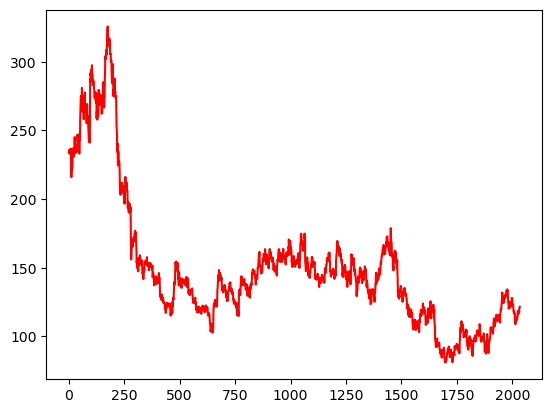

In [6]:
import matplotlib.pyplot as plt
plt.plot(dff,color='red')

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
print(dff)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [8]:
training_size=int(len(dff)*0.65)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]
training_size,test_size

(1322, 713)

In [10]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [11]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=20,verbose=1)

Epoch 1/100
62/62 [==============================] - 55s 490ms/step - loss: 0.0130 - val_loss: 0.0010
Epoch 2/100
62/62 [==============================] - 22s 363ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 3/100
62/62 [==============================] - 22s 360ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 4/100
62/62 [==============================] - 22s 357ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/100
62/62 [==============================] - 23s 367ms/step - loss: 0.0013 - val_loss: 7.7874e-04
Epoch 6/100
62/62 [==============================] - 11s 178ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 7/100
62/62 [==============================] - 13s 204ms/step - loss: 0.0011 - val_loss: 7.4347e-04
Epoch 8/100
62/62 [==============================] - 14s 234ms/step - loss: 0.0011 - val_loss: 7.5012e-04
Epoch 9/100
62/62 [==============================] - 12s 201ms/step - loss: 9.3701e-04 - val_loss: 6.0477e-04
Epoch 10/100
62/62 [==============================] - 12s 187m

62/62 [==============================] - 10815s 177s/step - loss: 2.5477e-04 - val_loss: 1.6084e-04
Epoch 76/100
62/62 [==============================] - 21865s 358s/step - loss: 2.4211e-04 - val_loss: 2.8590e-04
Epoch 77/100
62/62 [==============================] - 16s 251ms/step - loss: 2.5161e-04 - val_loss: 2.1314e-04
Epoch 78/100
62/62 [==============================] - 13s 203ms/step - loss: 2.1471e-04 - val_loss: 1.4296e-04
Epoch 79/100
62/62 [==============================] - 13s 207ms/step - loss: 2.8728e-04 - val_loss: 1.8650e-04
Epoch 80/100
62/62 [==============================] - 13s 210ms/step - loss: 2.2301e-04 - val_loss: 1.6350e-04
Epoch 81/100
62/62 [==============================] - 19s 302ms/step - loss: 1.9655e-04 - val_loss: 1.7617e-04
Epoch 82/100
62/62 [==============================] - 25s 397ms/step - loss: 2.4629e-04 - val_loss: 3.0909e-04
Epoch 83/100
62/62 [==============================] - 27s 436ms/step - loss: 2.2882e-04 - val_loss: 2.6159e-04
Epoch 84/1

In [17]:
tr_predict=model.predict(X_train)
te_predict=model.predict(X_test)

20/20 [==============================] - 2s 114ms/step


In [18]:
tr_predict=scaler.inverse_transform(tr_predict)
te_predict=scaler.inverse_transform(te_predict)
math.sqrt(mean_squared_error(y_train,tr_predict))

163.98058486094777

In [19]:
math.sqrt(mean_squared_error(ytest,te_predict))

115.61567742553282

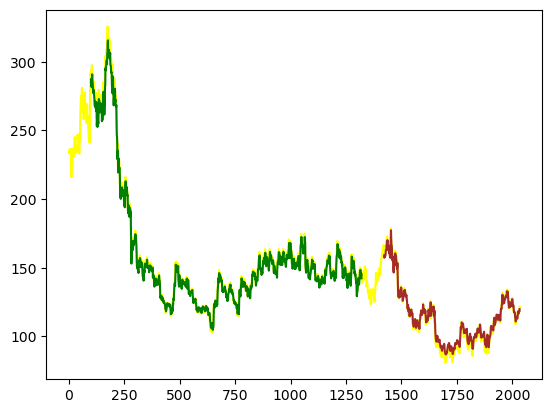

In [20]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(dff)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(tr_predict)+look_back, :] = tr_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dff)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(tr_predict)+(look_back*2)+1:len(dff)-1, :] = te_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dff),color="yellow")
plt.plot(trainPredictPlot,color='green')
plt.plot(testPredictPlot,color='brown')
plt.show()

In [21]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [22]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [23]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=393
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.04881536 0.05310458 0.04963235 0.05065359 0.05126634 0.04963235
 0.05902778 0.05555556 0.04084967 0.03737745 0.03737745 0.02655229
 0.02879902 0.0316585  0.0316585  0.03635621 0.02205882 0.01674837
 0.01450163 0.02226307 0.03615196 0.02675654 0.03206699 0.02696078
 0.03574346 0.03594771 0.04044118 0.03921569 0.04411765 0.02982026
 0.0122549  0.01286765 0.01143791 0.00245098 0.0059232  0.
 0.00714869 0.00428922 0.0067402  0.0063317  0.01123366 0.01960784
 0.02757353 0.03002451 0.03349673 0.04003268 0.04084967 0.03982843
 0.04166667 0.04370915 0.04758987 0.03594771 0.02839052 0.02410131
 0.01715686 0.01531863 0.01756536 0.02696078 0.02696078 0.03819444
 0.02839052 0.02369281 0.02920752 0.02328431 0.01919935 0.00653595
 0.00061275 0.00796569 0.01245915 0.01981209 0.01940359 0.02246732
 0.03125    0.02348856 0.0249183  0.02144608 0.04840686 0.04575163
 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667 0.04125817
 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049  0.

ValueError: cannot reshape array of size 371 into shape (1,393,1)

In [24]:
n=np.arange(1,101)
pred=np.arange(101,131)
dff.shape

(2035, 1)

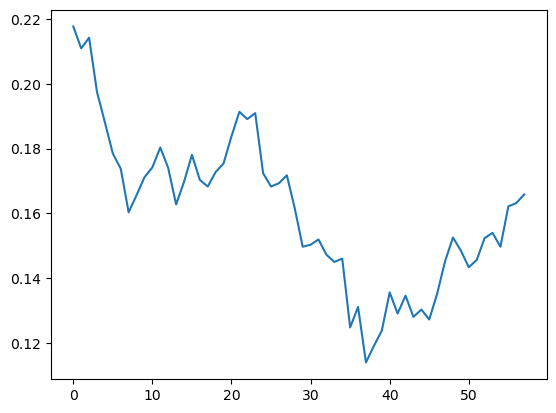

In [25]:
dff=dff.tolist()
dff.extend(lst_output)
plt.plot(dff[1977:])

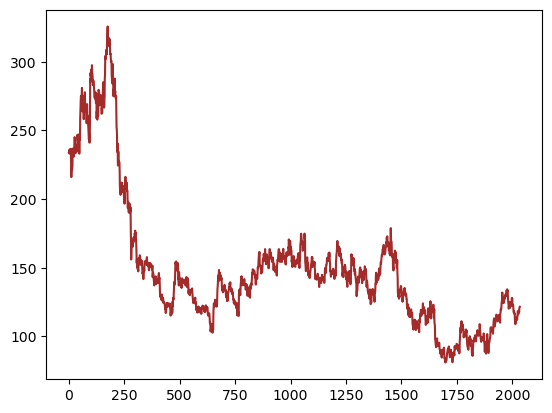

In [26]:
dff=scaler.inverse_transform(dff).tolist()
plt.plot(dff,color='brown')